# RELATÓRIO DE ANÁLISE EXPLORATÓRIA DE DADOS - PROJETO INTEGRADOR DE COMPUTAÇÃO III


## Desafios relacionados a computação das análises

Por se tratar de um conjunto de dados grande, com mais de  de quinze milhões de registros coletados do ano de 2019 até 2022, foram apontadas certas dificuldades para realizar a análise exploratória sobre o conjunto, sendo a principal delas o poder computacional. Os computadores utilizados para a análise de dados não suportaram armazenar todos os registros em memória, o que gerava travamentos e até mesmo desligamento das máquinas. A primeira tentativa de resolução do problema  foi utilizar outras bibliotecas em Python para fazer as análises, mas todas obtiveram o mesmo insucesso. Outra solução foi utilizar a plataforma do Google collaboratory para fazer as análises. Entretanto, a disponibilidade gratuita de recursos de memória era de apenas 12GB de memória, sendo utilizados 1GB para processos internos, o que não possibilitou também a análise completa. Sendo assim, o grupo decidiu realizar a análise sobre uma porcentagem de registros dos conjuntos de dados. Para isso, foram utilizadas algumas consultas no banco de dados com a amostragem de Bernoulli, como por exemplo: `SELECT coluna_1, coluna_2 FROM tabela TABLESAMPLE BERNOULLI(10)` retorna uma amostra de 10% do total de registros. Com alguns testes, a porcentagem máxima coletada sem ter interferência no desempenho foi de 35%, totalizando aproximadamente 5,5 milhões de registros. Com isso, prosseguiram as análises.

### Dicionário de dados do MEC - base de dados SISU

O dicionário de dados do SISU pode ser acessado [aqui](https://dadosabertos.mec.gov.br/sisu/item/133-dicionario-de-dados) para se ter uma descrição detalhada dos dados do projeto

In [1]:
import psycopg2 as pspg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter 
from scipy import stats
import dask.dataframe as dd
import sqlalchemy as sql
CONN = pspg.connect(database='notas', user='dev', password='dev', host='localhost', port='5030')

### Analisando as notas em si

criando um dataframe consultando os valores de notas no banco de dados:

In [2]:
df = pd.read_sql('''
  select 
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato
  from sisu_nota sd
  tablesample bernoulli(35)
  ''', con=CONN)

/tmp/ipykernel_51836/3047510004.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


verificando os tipos de valores existentes no data frame:

In [3]:
df.dtypes

peso_l              float64
peso_ch             float64
peso_cn             float64
peso_m              float64
peso_r              float64
nota_l              float64
nota_ch             float64
nota_cn             float64
nota_m              float64
nota_r              float64
nota_l_com_peso     float64
nota_ch_com_peso    float64
nota_cn_com_peso    float64
nota_m_com_peso     float64
nota_r_com_peso     float64
nota_candidato      float64
dtype: object

Verificando as amostras da tabela:

In [4]:
df.head()

,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato
0,1.0,1.0,2.0,4.0,3.0,618.7,602.2,666.3,679.0,880.0,618.7,602.2,1332.6,2716.0,2640.0,719.05
1,1.0,1.0,2.0,4.0,3.0,637.8,741.4,595.4,671.7,640.0,637.8,741.4,1190.8,2686.8,1920.0,652.44
2,1.0,1.0,2.0,4.0,3.0,454.3,510.8,471.7,661.4,860.0,454.3,510.8,943.4,2645.6,2580.0,648.55
3,1.0,1.0,2.0,4.0,3.0,536.7,530.7,524.9,629.6,840.0,536.7,530.7,1049.8,2518.4,2520.0,650.51
4,1.0,1.0,2.0,4.0,3.0,633.1,626.7,592.4,767.4,900.0,633.1,626.7,1184.8,3069.6,2700.0,746.75


In [5]:
df.tail()

,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato
5411485,1.0,1.0,1.0,1.0,2.0,526.7,522.5,428.2,483.8,760.0,526.7,522.5,428.2,483.8,1520.0,580.20
5411486,1.0,1.0,1.0,1.0,2.0,559.7,632.1,458.5,538.2,660.0,559.7,632.1,458.5,538.2,1320.0,584.75
5411487,1.0,1.0,1.0,1.0,2.0,544.7,607.0,560.3,526.2,900.0,544.7,607.0,560.3,526.2,1800.0,673.03
5411488,1.0,1.0,1.0,1.0,2.0,478.4,433.5,492.4,573.6,680.0,478.4,433.5,492.4,573.6,1360.0,556.32
5411489,1.0,1.0,1.0,1.0,2.0,469.2,619.4,500.8,418.7,480.0,469.2,619.4,500.8,418.7,960.0,494.68


In [6]:
df.sample(n=5)

,peso_l,peso_ch,peso_cn,peso_m,peso_r,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_l_com_peso,nota_ch_com_peso,nota_cn_com_peso,nota_m_com_peso,nota_r_com_peso,nota_candidato
1968942,1.0,1.0,1.0,1.0,1.0,608.3,701.3,699.7,943.1,960.0,608.3,701.3,699.7,943.1,960.0,782.48
4978320,1.0,1.0,1.0,1.0,1.0,665.2,731.3,667.5,717.7,760.0,665.2,731.3,667.5,717.7,760.0,708.34
3817175,5.0,5.0,4.0,2.0,3.0,494.7,505.1,486.2,428.0,540.0,2473.5,2525.5,1944.8,856.0,1620.0,495.78
1834319,1.0,1.0,1.0,1.0,1.0,579.6,538.7,412.9,383.7,840.0,579.6,538.7,412.9,383.7,840.0,550.98
4131668,1.0,1.0,1.0,1.0,1.0,473.8,548.5,530.5,563.5,420.0,473.8,548.5,530.5,563.5,420.0,507.26


verificando o `shape` da tabela, para analisar quantas linhas o dataframe irá analisar:

In [7]:
df.shape

(5411490, 16)

Primeiramente, foram calculadas algumas métricas sobre as notas dos candidatos e as notas por área de conhecimento (linguagens, ciências humanas, ciências da natureza, matemática e redação), disponibilizadas a seguir, arredondando para 3 casas decimais:


In [8]:
means = df.mean(axis=0) 
medians= df.median(axis=0,)
std = df.std(axis=0)
var = df.var(axis=0)
frame = pd.DataFrame({
    'média': means,
    'mediana': medians,
    'desvio padrão': std,
    'variância': var,
}).transpose()
frame[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']].round(3)

,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_candidato
média,539.302,556.568,507.713,554.529,643.021,566.789
mediana,544.600,565.000,503.700,542.300,620.000,558.940
desvio padrão,68.242,87.527,85.049,118.277,166.956,88.225
variância,4656.939,7660.916,7233.323,13989.564,27874.266,7783.566


Analisando a tabela, pode-se perceber que a área de ciências da natureza teve o menor desempenho entre as demais, pois sua média e mediana estão com valores próximos e são as menores medidas dentre as outras áreas de conhecimento, enquanto a redação possui as melhores métricas. Porém o desvio padrão possui um valor muito alto relativo ao número de registros. 


Para melhor visualização dos dados, foi construído um gráfico Boxplot para visualizar os quartis e os valores denominados outliers, e também um histograma para visualizar a distribuição das notas em intervalos de 20 pontos:

<Axes: >

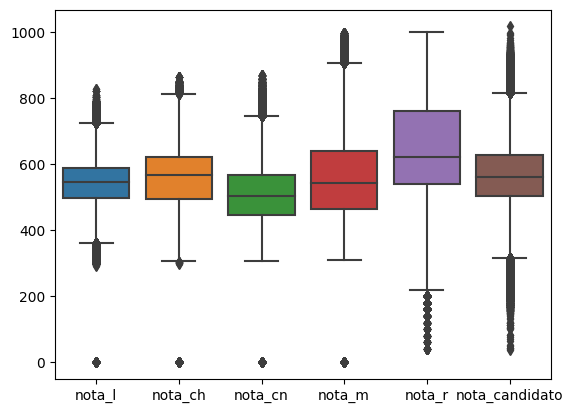

In [9]:
sns.boxplot(data=df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']])

Outro detalhe que pode ser visualizado é que o conjunto de dados possui valores iguais a 0 e superiores a 1000. Isso pode acontecer devido a:
- alunos desclassificados no exame;
- notas com média ponderada que superaram o valor de 1000.
Vide a seguir:

In [10]:
df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']].min()

nota_l             0.00
nota_ch            0.00
nota_cn            0.00
nota_m             0.00
nota_r            40.00
nota_candidato    37.78
dtype: float64

In [11]:
df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']].max()

nota_l             826.10
nota_ch            862.60
nota_cn            869.60
nota_m             996.10
nota_r            1000.00
nota_candidato    1015.97
dtype: float64

a seguir, são exibidos histogramas dos valores das notas de cada área de conhecimento e a média de cada registro:

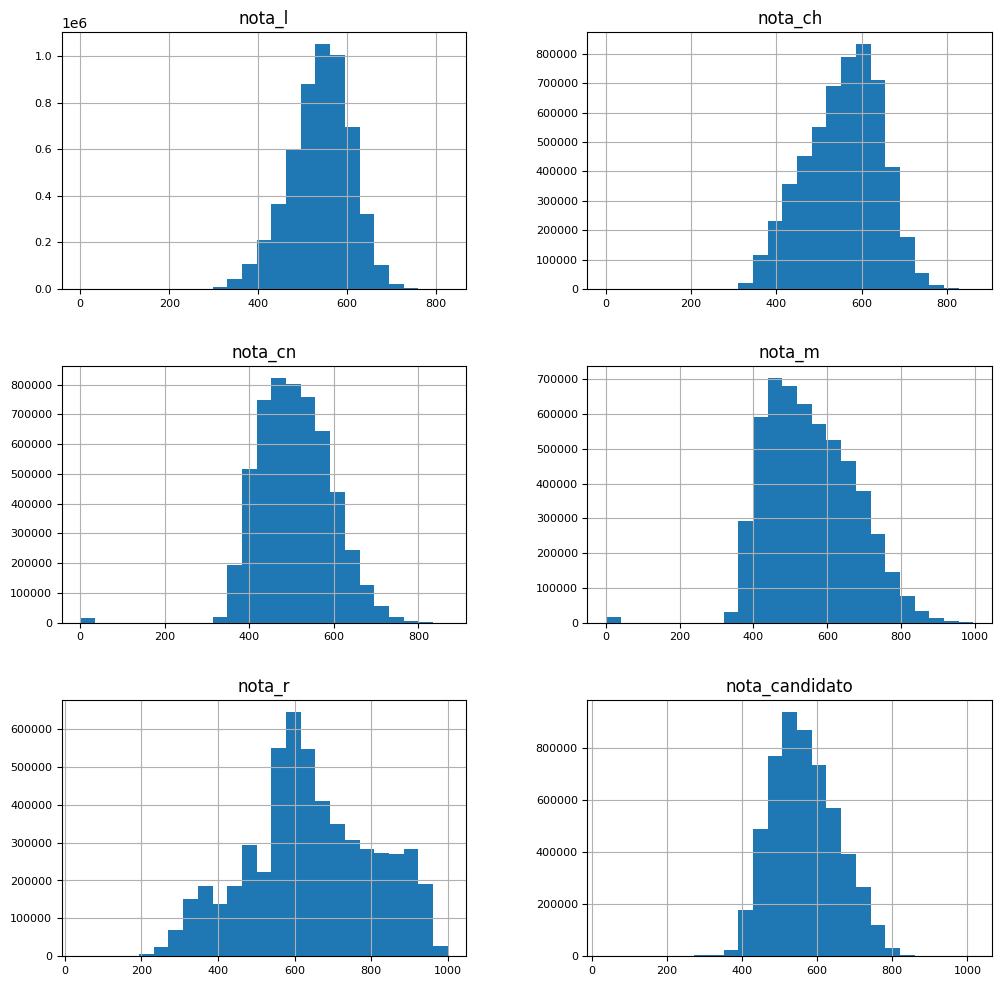

In [12]:

notas_sem_pesos = df[['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']]
notas_sem_pesos.hist(figsize=(12, 12), bins=25, xlabelsize=8, ylabelsize=8);

Pode-se notar que a distribuição das notas das áreas de conhecimento seguem um formato de sino, com exceção da nota de redação, que apresentou uma curva diferente para notas acima de 600 pontos. 

Outro detalhe que pode-se destacar é que as redações possuem as melhores notas, visto que o terceiro quartil do boxplot está acima das outras áreas de conhecimento, enquanto que ciências da natureza possui o pior desempenho, com o primeiro  quartil e mediana abaixo das demais.


Além da análise gráfica, verificou-se a normalidade das amostras por meio de um teste de Shapiro-Wilk, tendo a hipótese de que as notas seguem uma distribuição normal:

Com a saída, a nota de redação obteve um resultado muito atípico para o teste Shapiro-Wilk em relação às outras notas, tendo um valor p igual a 1 e um valor W maior que 1. Isso deve-se ao fato de a distribuição das notas de redação terem uma dispersão maior que as demais.


In [13]:
cols = ['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']

stat_data = []
p_values = []

for col in cols:
    stat, p = stats.shapiro(df[col])
    stat_data.append(stat)
    p_values.append(p)

frame = pd.DataFrame({
    'notas': cols,
    'W': stat_data,
    'p': p_values
})
frame

/home/gustavo/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,notas,W,p
0,nota_l,0.995614,0.0
1,nota_ch,0.990443,0.0
2,nota_cn,0.973113,0.0
3,nota_m,0.971525,0.0
4,nota_r,1.015413,1.0
5,nota_candidato,0.996199,0.0


Seguindo, temos um gráfico de correlação entre as notas, pesos das notas e notas com pesos:
com o gráfico acima, podemos destacar alguns pontos:
- a nota do candidato tem uma  forte correlação com as notas das áreas de conhecimento;
- as notas com peso possuem forte correlação com seus pesos
- as notas com peso não possuem uma correlação forte com as notas sem peso


<Axes: >

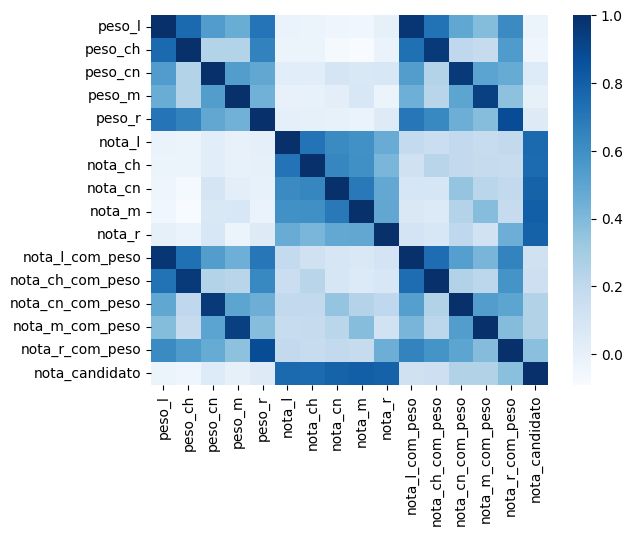

In [14]:
sns.heatmap(data=df.corr(), cmap='Blues')

## Analisando as notas por ano de inscrição

criando um dataframe com os valores no banco de dados:

In [15]:
df = pd.read_sql('''
  select 
    sd.peso_l,
    sd.peso_ch,
    sd.peso_cn,
    sd.peso_m,
    sd.peso_r,
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_l_com_peso,
    sd.nota_ch_com_peso,
    sd.nota_cn_com_peso,
    sd.nota_m_com_peso,
    sd.nota_r_com_peso,
    sd.nota_candidato,
    st.ano,
    st.edicao,
    st.etapa
  from sisu_nota sd
  tablesample bernoulli(35)
  inner join sisu_tempo st on sd.dimensao_tempo = st.id
  ''', con=CONN)

/tmp/ipykernel_51836/2841942416.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


Primeiramente, construímos um boxplot das notas de cada área de conhecimento e do candidato  por ano para visualizar as distribuições de 2019 a 2022:


<Axes: xlabel='notas', ylabel='pontuacao'>

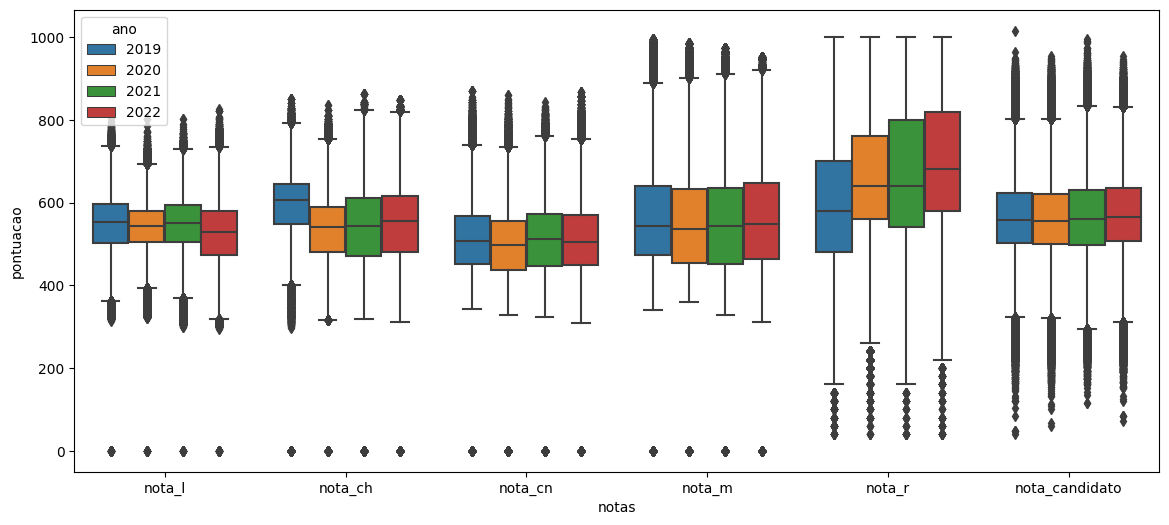

In [16]:
df_ano = df[['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato',
    'ano'
]]

df_ano = df_ano.melt(id_vars='ano', value_vars=['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato'
], var_name='notas', value_name='pontuacao')
plt.figure(figsize=(14, 6))
sns.boxplot(x='notas', y='pontuacao', hue='ano', data=df_ano, dodge=True)

Pode-se perceber que as notas de redação cresceram no decorrer dos anos e as notas de matemática mantiveram desempenhos semelhantes. Comparando as médias, medianas e desvios dos dados, podemos perceber que, mesmo mantendo a regularidade dos quartis vista no boxplot, o desvio padrão das notas de matemática foram superiores a 110 pontos e as médias permaneceram em um intervalo de aproximadamente 12 pontos.

In [17]:
groups = df[['nota_l',
    'nota_ch',
    'nota_cn',
    'nota_m',
    'nota_r',
    'nota_candidato',
    'ano'
]].groupby(by='ano')

In [18]:
notas = ['nota_l', 'nota_ch', 'nota_cn', 'nota_m', 'nota_r', 'nota_candidato']

means = groups[notas].mean()
medians = groups[notas].median()
std = groups[notas].std()
vars = groups[notas].var()


In [19]:
means

,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_candidato
ano,,,,,,
2019,547.919822,592.566808,512.605780,558.668904,589.306898,565.252909
2020,539.956875,533.660238,497.726158,549.243194,654.701237,562.798059
2021,545.952392,540.508218,510.511065,548.775499,651.823869,566.051605
2022,524.681678,548.573432,510.830044,558.948963,687.411801,573.207391


In [20]:
medians

,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_candidato
ano,,,,,,
2019,554.1,606.9,506.1,542.9,580.0,557.24
2020,544.2,539.7,496.2,535.4,640.0,554.56
2021,551.3,544.4,510.8,543.5,640.0,559.06
2022,528.9,555.1,504.7,548.8,680.0,566.14


In [21]:
std

,nota_l,nota_ch,nota_cn,nota_m,nota_r,nota_candidato
ano,,,,,,
2019,68.342070,74.156138,82.627800,112.034938,173.063013,86.362729
2020,57.643658,78.543886,81.916916,118.163767,153.419748,85.123414
2021,68.115611,94.681522,86.926634,125.652499,175.988666,93.391584
2022,75.716106,93.261332,88.960377,120.421490,150.859667,90.109511


## Analisando as notas por inscitos

criando o dataframe com os dados do banco:

In [22]:
df = pd.read_sql('''
  select 
    sd.nota_l,
    sd.nota_ch,
    sd.nota_cn,
    sd.nota_m,
    sd.nota_r,
    sd.nota_candidato,
    sd.nota_corte,
    sc.sexo,
    sc.uf_candidato,
    sc.aprovado,
    sc.data_nascimento,
    sc.opcao
  from sisu_nota sd
  tablesample bernoulli(35)
  inner join sisu_candidato sc on sd.dimensao_candidato = sc.id
  ''', con=CONN)

/tmp/ipykernel_51836/4206416582.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''


Primeiramente, agrupamos as notas por unidade federativa, para analisar o desempenho dos inscritos por estado. Obtendo algumas métricas de disperção e medidas centrais, temos:

In [23]:
groups = df.groupby(by='uf_candidato')
describer = groups['nota_candidato'].describe().round(3).reset_index()
describer

,uf_candidato,count,mean,std,min,25%,50%,75%,max
0,AC,41210.0,546.186,91.072,147.16,475.632,533.43,608.195,899.07
1,AL,123321.0,533.777,83.127,52.00,473.820,522.00,582.530,926.47
2,AM,80779.0,534.145,78.612,120.00,478.660,526.28,581.995,849.26
3,AP,32989.0,542.251,90.912,195.23,476.030,524.28,594.720,953.14
4,BA,430804.0,551.193,81.426,131.10,491.690,543.35,605.160,903.08
5,CE,341700.0,567.967,88.974,122.58,502.740,559.16,627.120,954.50
6,DF,102655.0,577.756,88.494,40.00,512.820,571.58,639.530,917.28
7,ES,115104.0,578.652,88.090,158.80,515.840,572.92,638.943,855.21
8,GO,162403.0,571.875,90.147,71.11,504.830,564.34,635.865,924.24
9,MA,245296.0,545.954,93.532,44.00,478.480,530.03,598.090,1021.42


Então montamos um gráico de barras, analisando a quantidade de inscritos por estado. Os que possuíram o menor número de inscritos foram cinco estados da região Norte: Roraima, Rondônia, Amapá, Acre e Tocantins. Os que possuíram o maior número foram três estados do Sudeste e dois do Nordeste: São Paulo, Minas Gerais, Rio de Janeiro, Bahia e Ceará.

<Axes: xlabel='uf_candidato', ylabel='count'>

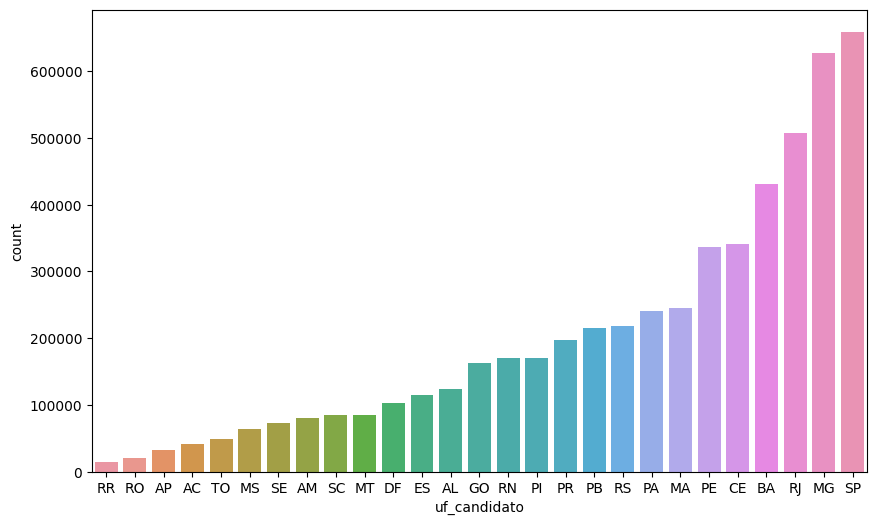

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='uf_candidato', y='count', data=describer.sort_values(by='count'))

comparando a média de notas por Estado, temos: o seguinte gráfico de barras, da menor média até a maior:

<Axes: xlabel='uf_candidato', ylabel='mean'>

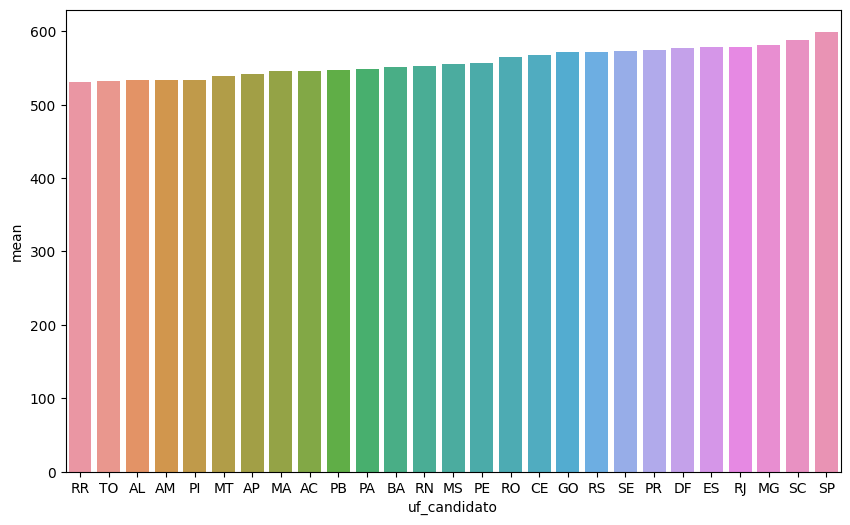

In [26]:
plt.figure(figsize=(10,6))
sns.set_palette('Blues')
sns.barplot(x='uf_candidato', y='mean', data=describer.sort_values(by='mean'))

Visualizando os valores:

In [27]:
describer.sort_values(by='mean', ascending=False)[['uf_candidato', 'mean']].reset_index()

,index,uf_candidato,mean
0,25,SP,599.712
1,23,SC,588.335
2,10,MG,581.260
3,18,RJ,578.759
4,7,ES,578.652
5,6,DF,577.756
6,17,PR,574.281
7,24,SE,573.858
8,22,RS,572.309
9,8,GO,571.875


In [28]:
describer['mean'].std()

19.40265888320185

A amplitude das médias é de cerca de 70 pontos, enquanto que o desvio padrão é cerca de 19.40. Portanto, temos a hipótese de que as médias das notas são iguais. Para isso, aplicaremos um teste Shapiro-Wilk para avaliar se os dados possuem distribuição normal:

In [10]:
p_values = []
stats_values = []
ufs = df['uf_candidato'].unique()

for uf in ufs:
    uf_data = df[df['uf_candidato'] == uf]['nota_candidato']
    stat, p = stats.shapirob(uf_data)
    p_values.append(p)
    stats_values.append(stat)

shapiro_df = pd.DataFrame({
    'uf': ufs,
    'p': p_values,
    'stat': stats_values
})

shapiro_df.round(7)

/home/gustavo/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,uf,p,stat
0,RJ,0.0,0.994323
1,BA,0.0,0.988968
2,MG,0.0,0.993753
3,DF,0.0,0.993260
4,ES,0.0,0.993071
5,GO,0.0,0.990171
6,SP,0.0,0.996971
7,SC,0.0,0.995504
8,RS,0.0,0.993117
9,MS,0.0,0.986005


Os valores de `p` se mostraram menores que 0.01, então temos que as amostras não seguem uma distribuição normal. Portanto, faremos um teste ede Kruskal-Wallis para as amostras de cada estado: 

In [29]:
print('h0: as médias dos grupos são iguais')

stat, p = stats.kruskal(*[group['nota_candidato'].values for name, group in groups])

print(f"Resultado do teste de Kruskal-Wallis: statistic={stat:.4f}, p-value={p:.4f}")

if p < 0.01:
    print('hipótese nula rejeitada')
else:
    print('hipótese nula confirmada')

h0: as médias dos grupos são iguais
Resultado do teste de Kruskal-Wallis: statistic=290071.9288, p-value=0.0000
hipótese nula rejeitada
